# Analiza modela


In [2]:
from settings import *
import os

model_picks = next(os.walk("./models"))[1]
model_picks

['alexnet_1x', 'alexnet_3x', 'alexnet_10x']

In [4]:
from fastai.vision.all import ClassificationInterpretation, load_learner
from utils.learners import create_dataloaders

analyses = {}
for model in model_picks:
    analysis = {}
    dls = create_dataloaders(container, categories, show_batch=False)
    testee = {
        "breath": load_learner(garage/model/"breath.pkl"),
        "depth": load_learner(garage/model/"depth.pkl")
    }

    for key in categories.keys():
        analysis[key] = ClassificationInterpretation.from_learner(testee[key], dl=dls[key].train)
    
    analyses[model] = analysis

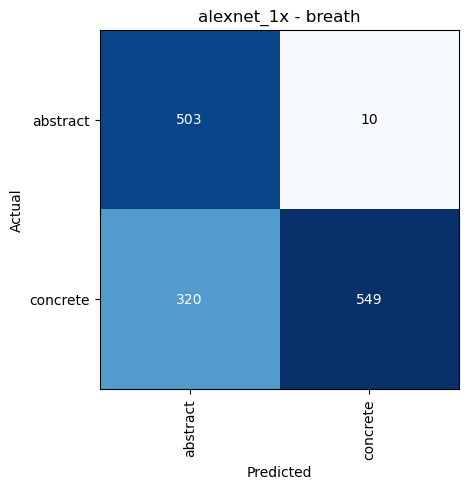

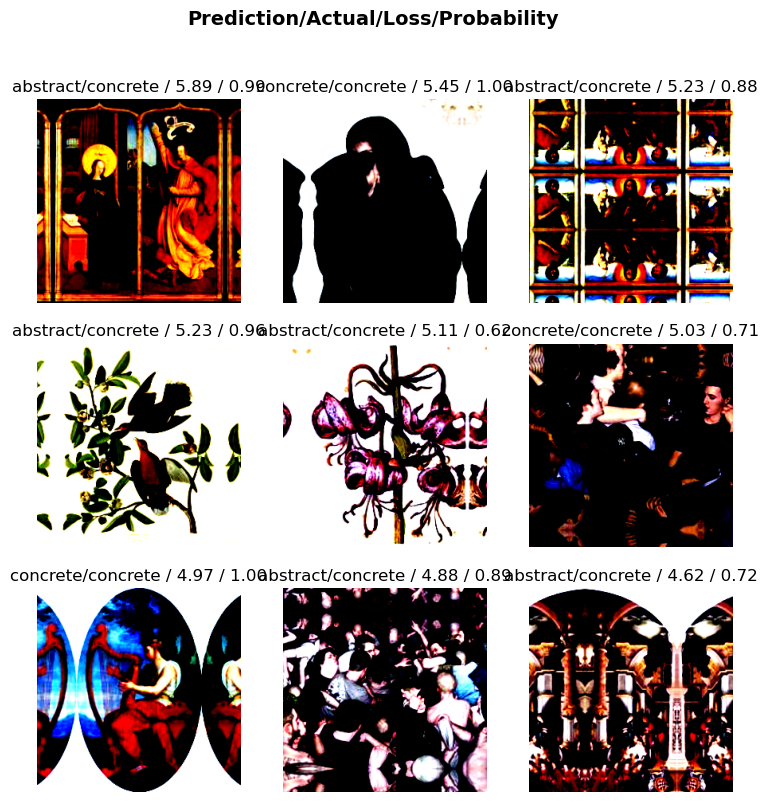

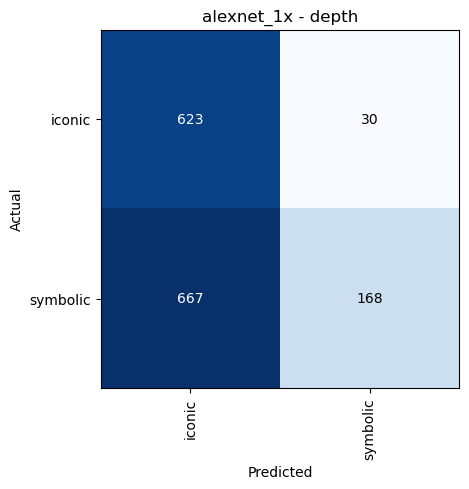

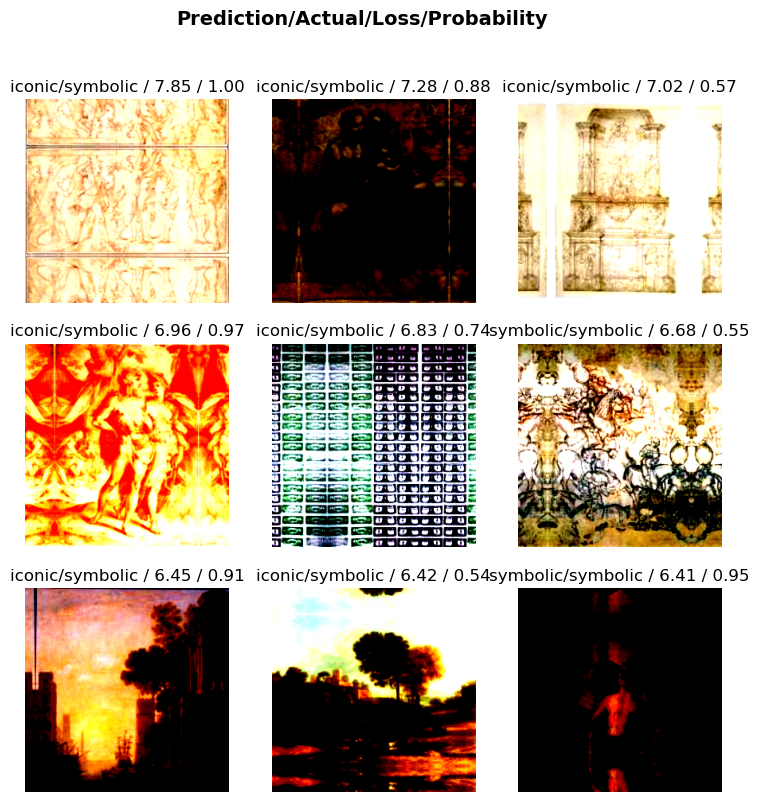

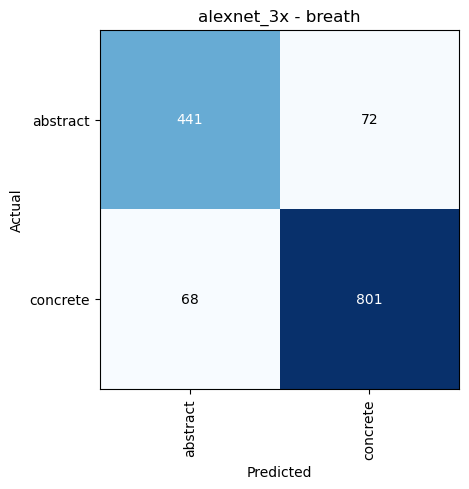

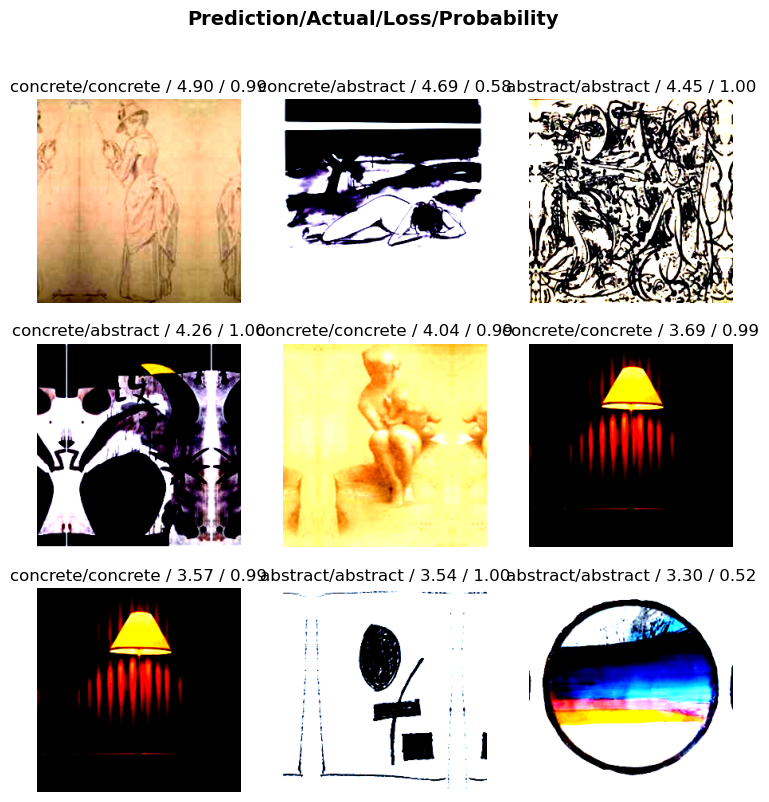

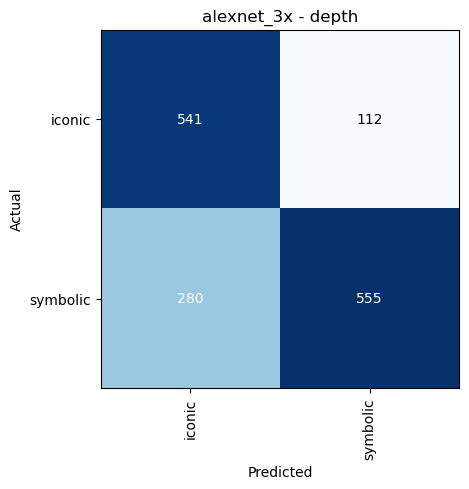

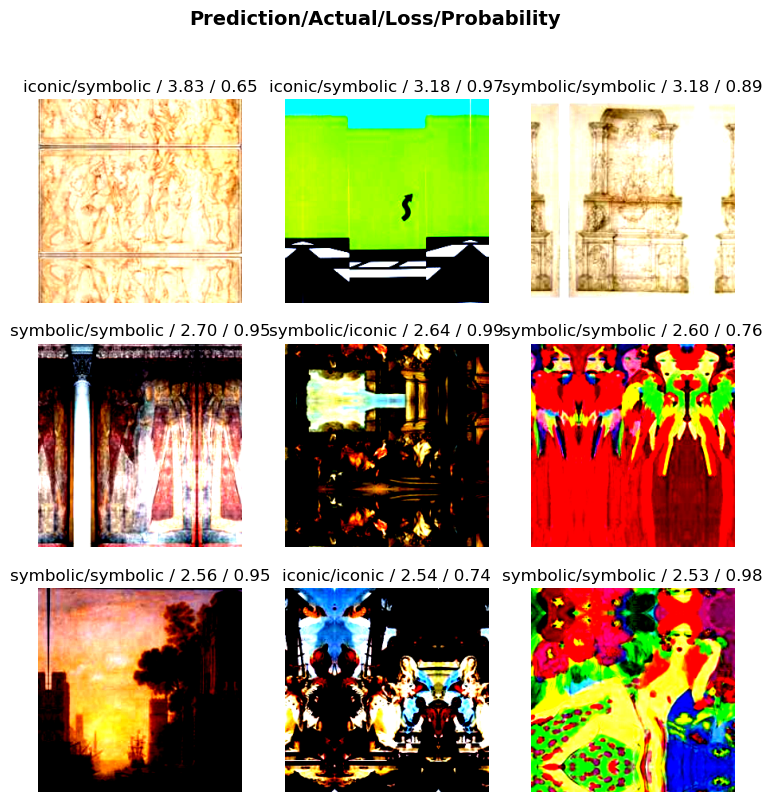

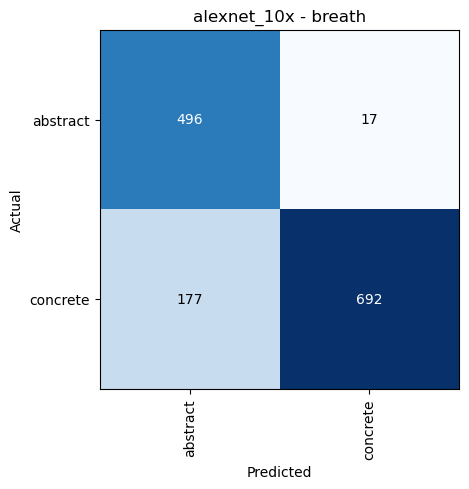

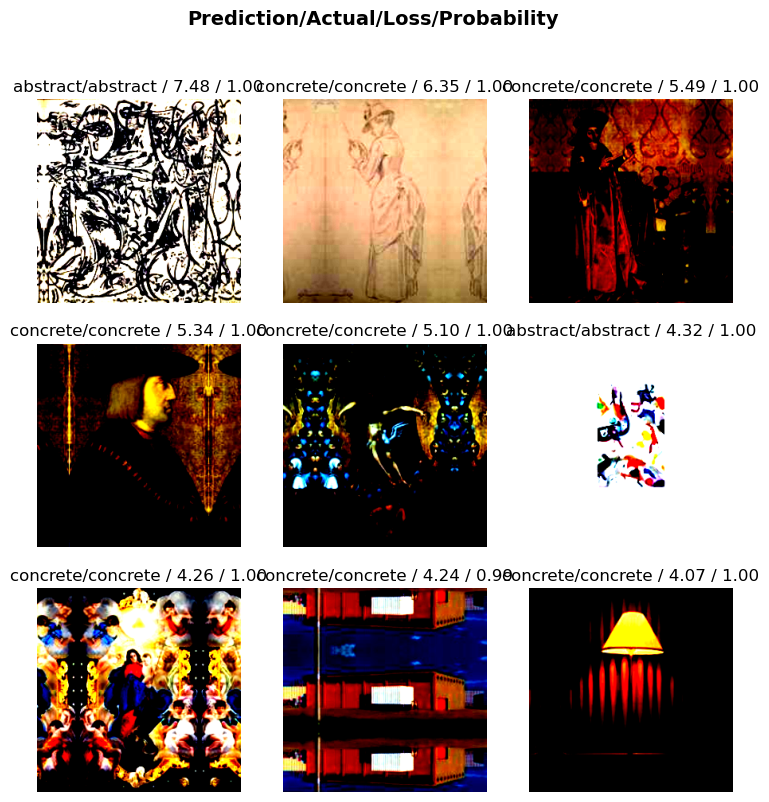

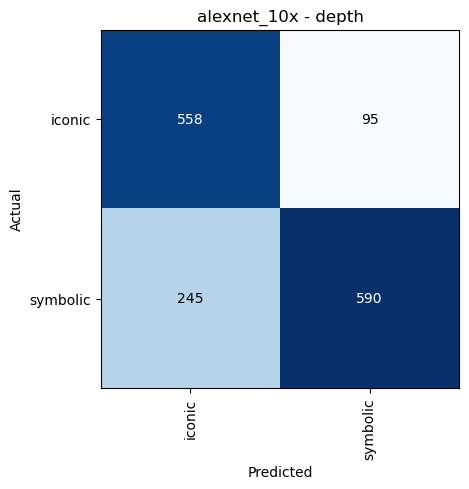

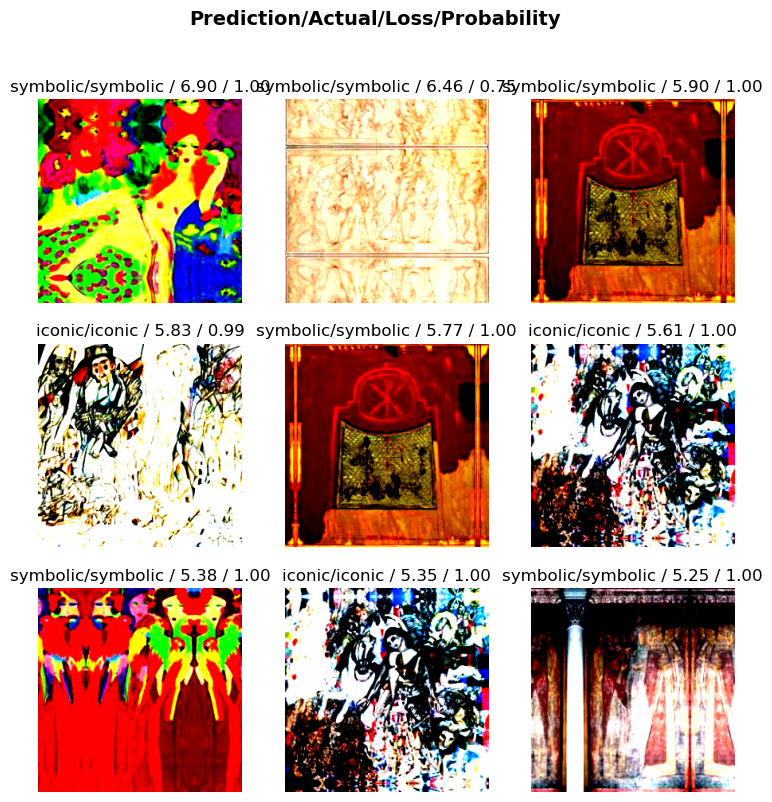

In [5]:
for model_name, model in analyses.items():
    for dimension_name, dimension in model.items():
        title=f"{model_name} - {dimension_name}"
        dimension.plot_confusion_matrix(title=title)
        dimension.plot_top_losses(9, title=title)